                       total_score    fa_rep  hbond_sc   all_cst  \
total_score               1.000000  0.188903  0.300891 -0.018832   
fa_rep                    0.188903  1.000000 -0.128547 -0.038548   
hbond_sc                  0.300891 -0.128547  1.000000 -0.070438   
all_cst                  -0.018832 -0.038548 -0.070438  1.000000   
tot_pstat_pm             -0.053927  0.166054 -0.091200  0.014849   
tot_nlpstat_pm           -0.188449  0.126895 -0.095216  0.005831   
tot_burunsat_pm           0.024324  0.023135  0.186742  0.005974   
tot_hbond_pm             -0.398150  0.092351 -0.616057  0.038748   
tot_NLconts_pm           -0.082309  0.293597 -0.367273  0.058325   
tot_nlsurfaceE_pm         0.132954 -0.030883  0.098280 -0.006945   
tot_total_charge         -0.078413  0.170511 -0.055954  0.012164   
tot_total_pos_charges    -0.155793  0.199226 -0.223336 -0.000291   
tot_total_neg_charges    -0.028624 -0.072305 -0.128568 -0.019141   
tot_seq_recovery               NaN       NaN    

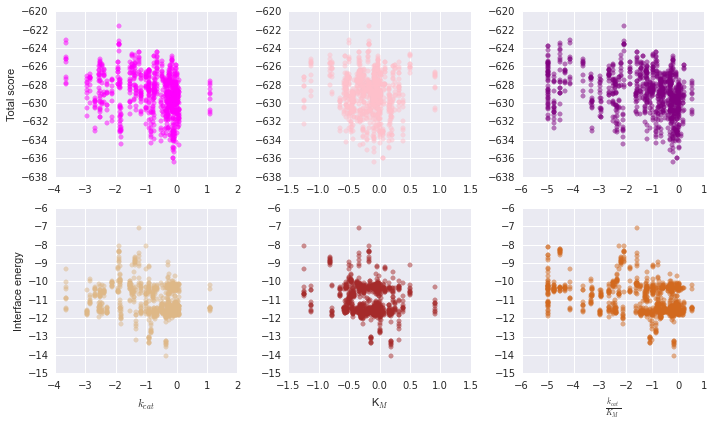

In [34]:
import pandas
from sklearn import svm 
from sklearn.externals import joblib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
% matplotlib inline

# data
df = pandas.read_csv( 'data.csv' )

fig, ax = plt.subplots( 2, 3, figsize=(10,6) )
ax[0, 0].scatter( df.kcat, df.total_score, color='magenta', alpha=.5 )
ax[0, 0].set_ylabel( 'Total score' )
ax[0, 1].scatter( df.km, df.total_score, color='pink', alpha=.5 )
ax[0, 2].scatter( df.eff, df.total_score, color='purple', alpha=.5 )
ax[1, 0].scatter( df.kcat, df.SR_5_interf_E_1_2, color='burlywood', alpha=.5 )
ax[1, 0].set_xlabel( '$k_{cat}$' ); ax[1, 0].set_ylabel( 'Interface energy' )
ax[1, 1].scatter( df.km, df.SR_5_interf_E_1_2, color='brown', alpha=.5 )
ax[1, 1].set_xlabel( 'K$_M$' );
ax[1, 2].scatter( df.eff, df.SR_5_interf_E_1_2, color='chocolate', alpha=.5 )
ax[1, 2].set_xlabel( r'$\frac{k_{cat}}{K_M}$' )

plt.tight_layout()

#df = df.fillna( { 'kcat': -5, 'km': -5, 'eff': -5 } )
df = df.dropna()

drop = [ 'index', 'kcat', 'km', 'eff', 'SR_1_all_cst', 
         'SR_2_all_cst', 'SR_3_all_cst', 'SR_4_all_cst', ]

y = df.kcat.as_matrix()
X = df.drop( drop, 1 ).as_matrix()

print df.corr()

0.405932045747


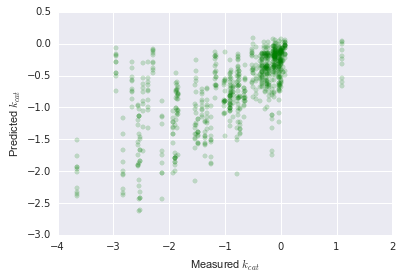

In [63]:
clf = svm.SVR()
clf.fit( X, y )
preds = [ clf.predict( X[ i ] )[0] for i in range( len( X ) ) ]
plt.scatter( y, preds, color='g', alpha=0.19 )
plt.xlabel( 'Measured $k_{cat}$' ); plt.ylabel( 'Predicted $k_{cat}$' )
print clf.score( X, y )
clf.score?

In [79]:
from sklearn import svm, grid_search

parameters = {
    'C': [ 10 ** i for i in range( 0, 2 ) ], 
    'gamma': [ 10 ** i for i in range( -9, 0, 3 ) ] + [ 0 ], 
}

svr = svm.SVR()
clf = grid_search.GridSearchCV( svr, parameters )
clf.fit( X, y )

GridSearchCV(cv=None, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'C': [1, 10], 'gamma': [1e-09, 1e-06, 0.001, 0]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [80]:
clf.score( X, y )

0.40593204574746067